### Load the packages and functions

In [25]:
%run artifactpackage.ipynb
%run Confusionmatrix.ipynb
%run masrur_ploting_utils.ipynb

### Load the training and test datasets

In [26]:
dr = pd.read_csv('/media/masharifin/D Drive/ComprehensiveExam/Datasets/CIC-Malmem/test.csv')
dr['Class'] = dr['Class'].replace({'Benign': 0, 'Malware': 1})
dr

,pslist.nproc,pslist.nppid,pslist.avg_threads,pslist.nprocs64bit,pslist.avg_handlers,dlllist.ndlls,dlllist.avg_dlls_per_proc,handles.nhandles,handles.avg_handles_per_proc,handles.nport,...,svcscan.kernel_drivers,svcscan.fs_drivers,svcscan.process_services,svcscan.shared_process_services,svcscan.interactive_process_services,svcscan.nactive,callbacks.ncallbacks,callbacks.nanonymous,callbacks.ngeneric,Class
0,40,12,1.380512e+01,0,310.075595,2092,52.300000,12403,310.075595,0,...,222,26,27,118,0,123,88,0,8,0
1,40,12,1.375000e+01,0,304.275000,2064,51.600000,12171,304.275000,0,...,222,26,27,118,0,124,88,0,8,0
2,44,13,1.257603e+01,0,279.283605,2170,48.909541,12395,279.283605,0,...,222,26,27,118,0,124,88,0,8,0
3,42,12,1.305386e+01,0,292.704269,2082,49.592771,12293,292.704269,0,...,222,26,27,118,0,124,88,0,8,0
4,44,18,1.231995e+01,0,249.157298,1948,43.492821,11161,254.260744,0,...,222,26,24,118,0,122,87,0,8,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2995,76,24,1.610526e+01,0,-0.039474,3389,46.424658,25313,356.521127,0,...,0,0,0,0,0,0,49,1,19,1
2996,77,25,1.620779e+01,0,-0.038961,3526,49.661972,29719,407.109589,0,...,0,0,0,0,0,0,40,1,17,1
2997,67,22,3.923985e+03,0,-0.059701,3268,50.276923,27282,440.032258,0,...,0,0,0,0,0,0,46,0,19,1
2998,73,26,4.354715e+07,0,-0.041096,3358,50.119403,26680,404.242424,0,...,0,0,0,0,0,0,46,1,18,1


In [27]:
dc = pd.read_csv('/media/masharifin/D Drive/ComprehensiveExam/Datasets/CIC-Malmem/train.csv')
dc['Class'] = dc['Class'].replace({'Benign': 0, 'Malware': 1})
dc

,pslist.nproc,pslist.nppid,pslist.avg_threads,pslist.nprocs64bit,pslist.avg_handlers,dlllist.ndlls,dlllist.avg_dlls_per_proc,handles.nhandles,handles.avg_handles_per_proc,handles.nport,...,svcscan.kernel_drivers,svcscan.fs_drivers,svcscan.process_services,svcscan.shared_process_services,svcscan.interactive_process_services,svcscan.nactive,callbacks.ncallbacks,callbacks.nanonymous,callbacks.ngeneric,Class
0,40,12,13.805119,0,310.075595,2092,52.300000,12403,310.075595,0,...,222,26,27,118,0,123,88,0,8,0
1,40,12,13.750000,0,304.275000,2064,51.600000,12171,304.275000,0,...,222,26,27,118,0,124,88,0,8,0
2,44,13,12.576029,0,279.283605,2170,48.909541,12395,279.283605,0,...,222,26,27,118,0,124,88,0,8,0
3,42,12,13.053861,0,292.704269,2082,49.592771,12293,292.704269,0,...,222,26,27,118,0,124,88,0,8,0
4,44,18,12.319954,0,249.157298,1948,43.492821,11161,254.260744,0,...,222,26,24,118,0,122,87,0,8,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32223,37,15,10.108108,0,215.486487,1453,39.270270,7973,215.486487,0,...,221,26,24,116,0,120,86,0,8,1
32224,37,14,9.945946,0,190.216216,1347,36.405405,7038,190.216216,0,...,221,26,24,116,0,116,88,0,8,1
32225,38,15,9.842105,0,210.026316,1448,38.105263,7982,215.729730,0,...,221,26,24,116,0,120,88,0,8,1
32226,37,15,10.243243,0,215.513513,1452,39.243243,7974,215.513513,0,...,221,26,24,116,0,120,87,0,8,1


In [28]:
features = dc.drop('Class', axis=1).values
Class = dc['Class'].values
X_train=dc.drop(columns='Class')
y_train=dc['Class']

In [29]:
features = dr.drop('Class', axis=1).values
Class = dr['Class'].values
X_test=dr.drop(columns='Class')
y_test=dr['Class']

## Machine learning Model Build 

### Model_1: Decision Tree

In [30]:
Dt_classifier= DecisionTreeClassifier(random_state=29)
Dt_classifier.fit(X_train, y_train)

# Predict on training and test sets
y_pred_train_dt = Dt_classifier.predict(X_train)
y_pred_test_dt = Dt_classifier.predict(X_test)

# Calculate accuracy on training and test sets
accuracy_train_dt = accuracy_score(y_train, y_pred_train_dt)
accuracy_test_dt = accuracy_score(y_test, y_pred_test_dt)

print(f"Training Accuracy: {accuracy_train_dt}")
print(f"Test Accuracy: {accuracy_test_dt}")

Training Accuracy: 1.0
Test Accuracy: 1.0


In [31]:
filename_dt= 'Binary_security_dt_sm.sav'
pickle.dump(Dt_classifier, open(filename_dt, 'wb'))
load_model_dt=pickle.load(open('Binary_security_dt_sm.sav','rb'))
load_pred_dt=load_model_dt.predict(X_test)

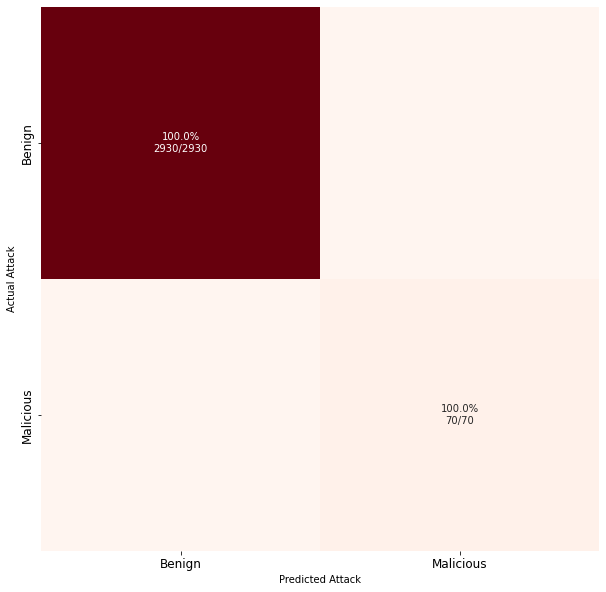

In [32]:
plot_cm(y_test, load_pred_dt)
plt.savefig('cm.eps',dpi=600)

                                   Feature  Importance
48         svcscan.shared_process_services    0.969066
8             handles.avg_handles_per_proc    0.017138
47                svcscan.process_services    0.004878
51                    callbacks.ncallbacks    0.004233
27                    malfind.commitCharge    0.002228
25               ldrmodules.not_in_mem_avg    0.001706
11                          handles.nevent    0.000751
39    psxview.not_in_pspcid_list_false_avg    0.000000
31             psxview.not_in_ethread_pool    0.000000
32              psxview.not_in_pspcid_list    0.000000
33            psxview.not_in_csrss_handles    0.000000
34                  psxview.not_in_session    0.000000
35                 psxview.not_in_deskthrd    0.000000
36         psxview.not_in_pslist_false_avg    0.000000
37  psxview.not_in_eprocess_pool_false_avg    0.000000
38   psxview.not_in_ethread_pool_false_avg    0.000000
42       psxview.not_in_deskthrd_false_avg    0.000000
40  psxvie

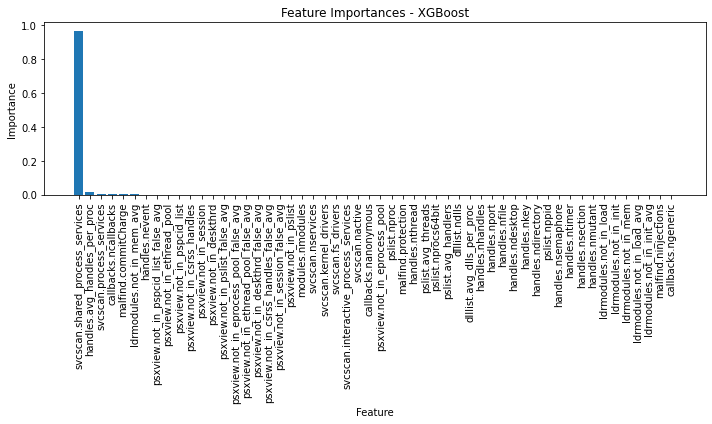

In [33]:
# Get the feature importance scores from the trained Decision Tree model
feature_importance = Dt_classifier.feature_importances_

# Create a DataFrame to store the feature names and their importance scores
feature_importance_df = pd.DataFrame({'Feature': X_test.columns, 'Importance': feature_importance})

# Sort the DataFrame by importance in descending order
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Print the ranked list of features with their importance scores
print(feature_importance_df)

# Plot the feature importances
plt.figure(figsize=(10, 6))
plt.bar(feature_importance_df['Feature'], feature_importance_df['Importance'])
plt.xticks(rotation=90)
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.title('Feature Importances - XGBoost')
plt.tight_layout()
plt.show()

In [34]:
# Initialize  model
Dt_classifier = DecisionTreeClassifier(random_state=29)

# Define the number of folds for cross-validation
num_folds = 5

# Perform cross-validation
cross_val_scores = cross_val_score(Dt_classifier, X_test, y_test, cv=num_folds)

# Print the cross-validation scores
print("Cross-Validation Scores:", cross_val_scores)

# Calculate the mean and standard deviation of the cross-validation scores
mean_score = cross_val_scores.mean()
std_score = cross_val_scores.std()

# Print the mean and standard deviation
print("Mean Score:", mean_score)
print("Standard Deviation:", std_score)

Cross-Validation Scores: [1. 1. 1. 1. 1.]
Mean Score: 1.0
Standard Deviation: 0.0


### Model_2: Random forest

In [35]:
rf_classifier=RandomForestClassifier(n_estimators=100)
rf_classifier.fit(X_train, y_train)
y_pred_rf=rf_classifier.predict(X_test)
# Predict on training and test sets
y_pred_train_rf = rf_classifier.predict(X_train)
y_pred_test_rf = rf_classifier.predict(X_test)

# Calculate accuracy on training and test sets
accuracy_train_rf = accuracy_score(y_train, y_pred_train_rf)
accuracy_test_rf = accuracy_score(y_test, y_pred_test_rf)

print(f"Training Accuracy: {accuracy_train_rf}")
print(f"Test Accuracy: {accuracy_test_rf}")

Training Accuracy: 1.0
Test Accuracy: 1.0


In [36]:
filename_rf= 'Binary_security_rf_sm.sav'
pickle.dump(rf_classifier, open(filename_rf, 'wb'))
load_model_dt=pickle.load(open('Binary_security_rf_sm.sav','rb'))
load_pred_rf=load_model_dt.predict(X_test)

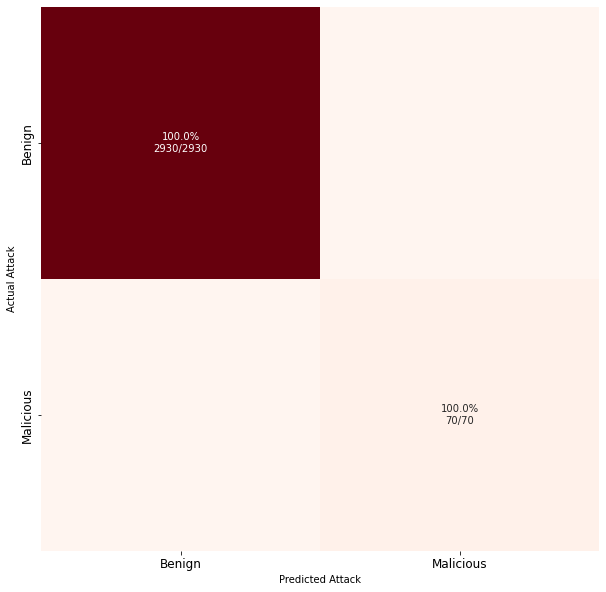

In [37]:
plot_cm(y_test, load_pred_rf)
plt.savefig('cm.eps',dpi=600)

                                   Feature  Importance
45                  svcscan.kernel_drivers    0.138337
48         svcscan.shared_process_services    0.110831
19                         handles.nmutant    0.100052
44                       svcscan.nservices    0.091495
18                        handles.nsection    0.074826
11                          handles.nevent    0.069491
16                      handles.nsemaphore    0.052831
13                            handles.nkey    0.051520
6                dlllist.avg_dlls_per_proc    0.047649
5                            dlllist.ndlls    0.047008
7                         handles.nhandles    0.035325
8             handles.avg_handles_per_proc    0.034009
20                  ldrmodules.not_in_load    0.024364
21                  ldrmodules.not_in_init    0.018810
17                          handles.ntimer    0.016957
4                      pslist.avg_handlers    0.013696
47                svcscan.process_services    0.013387
14        

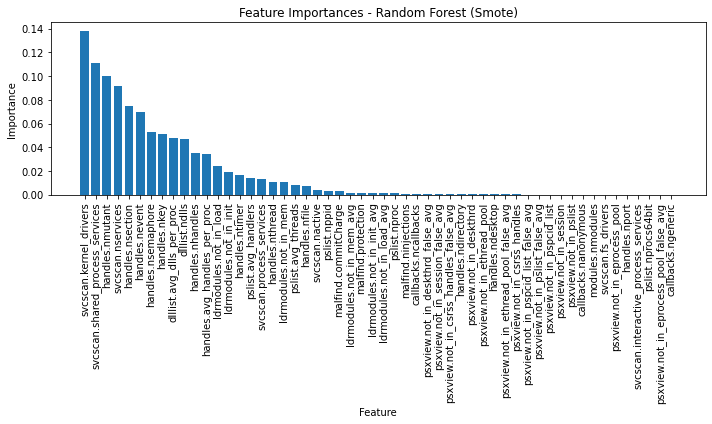

In [38]:
# Get the feature importance scores from the trained Random Forest model
feature_importance = rf_classifier.feature_importances_

# Create a DataFrame to store the feature names and their importance scores
feature_importance_df = pd.DataFrame({'Feature': X_test.columns, 'Importance': feature_importance})

# Sort the DataFrame by importance in descending order
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Print the ranked list of features with their importance scores
print(feature_importance_df)

# Plot the feature importances
plt.figure(figsize=(10, 6))
plt.bar(feature_importance_df['Feature'], feature_importance_df['Importance'])
plt.xticks(rotation=90)
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.title('Feature Importances - Random Forest (Smote)')
plt.tight_layout()
plt.show()

In [39]:
# Define the number of folds for cross-validation
num_folds = 5

# Perform cross-validation
cross_val_scores = cross_val_score(rf_classifier, X_test, y_test, cv=num_folds)

# Print the cross-validation scores
print("Cross-Validation Scores:", cross_val_scores)

# Calculate the mean and standard deviation of the cross-validation scores
mean_score = cross_val_scores.mean()
std_score = cross_val_scores.std()

# Print the mean and standard deviation
print("Mean Score:", mean_score)
print("Standard Deviation:", std_score)

Cross-Validation Scores: [1. 1. 1. 1. 1.]
Mean Score: 1.0
Standard Deviation: 0.0


### Model_3: LGBM

In [40]:
lgb_nor=lgb.LGBMClassifier(n_jobs= -1)
lgb_nor.fit(X_train,y_train)
y_pred_lgbm =lgb_nor.predict(X_test)
print(y_pred_lgbm)
cohen_kappa_score(y_test,y_pred_lgbm)

[0 0 0 ... 1 1 1]


1.0

In [41]:
# Predict on training and test sets
y_pred_train_lgb = lgb_nor.predict(X_train)
y_pred_test_lgb = lgb_nor.predict(X_test)

# Calculate accuracy on training and test sets
accuracy_train_lgb = accuracy_score(y_train, y_pred_train_lgb)
accuracy_test_lgb = accuracy_score(y_test, y_pred_test_lgb)

print(f"Training Accuracy: {accuracy_train_lgb}")
print(f"Test Accuracy: {accuracy_test_lgb}")

Training Accuracy: 1.0
Test Accuracy: 1.0


In [42]:
print("",classification_report(y_test,y_pred_lgbm))

               precision    recall  f1-score   support

           0       1.00      1.00      1.00      2930
           1       1.00      1.00      1.00        70

    accuracy                           1.00      3000
   macro avg       1.00      1.00      1.00      3000
weighted avg       1.00      1.00      1.00      3000



In [43]:
accuracy = lgb_nor.score(X_test, y_test)
print("Accuracy:", accuracy)

Accuracy: 1.0


In [44]:
filename_lgbm= 'Binary_security_lgbm_rm.sav'
pickle.dump(lgb_nor, open(filename_lgbm, 'wb'))
load_model_lgbm=pickle.load(open('Binary_security_lgbm_sm.sav','rb'))
load_pred_lgbm=load_model_lgbm.predict(X_test)

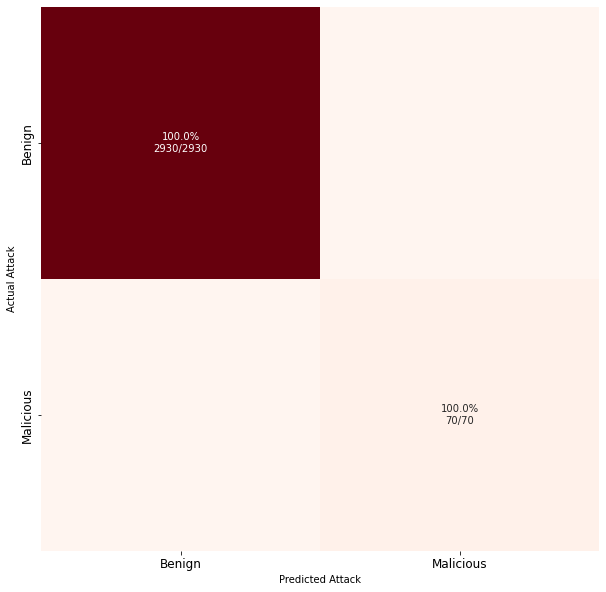

In [45]:
plot_cm(y_test, load_pred_lgbm)
plt.savefig('cm.eps',dpi=600)

                                   Feature  Importance
45                  svcscan.kernel_drivers    0.138337
48         svcscan.shared_process_services    0.110831
19                         handles.nmutant    0.100052
44                       svcscan.nservices    0.091495
18                        handles.nsection    0.074826
11                          handles.nevent    0.069491
16                      handles.nsemaphore    0.052831
13                            handles.nkey    0.051520
6                dlllist.avg_dlls_per_proc    0.047649
5                            dlllist.ndlls    0.047008
7                         handles.nhandles    0.035325
8             handles.avg_handles_per_proc    0.034009
20                  ldrmodules.not_in_load    0.024364
21                  ldrmodules.not_in_init    0.018810
17                          handles.ntimer    0.016957
4                      pslist.avg_handlers    0.013696
47                svcscan.process_services    0.013387
14        

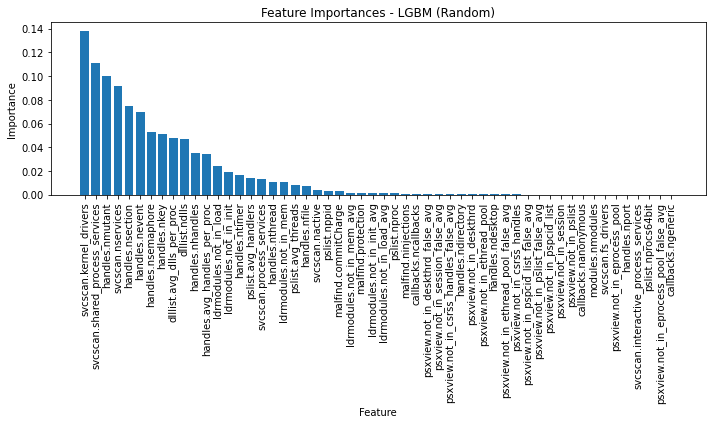

In [46]:
# Get the feature importance scores from the trained LGBM model
feature_importance = lgb_nor.feature_importances_

# Create a DataFrame to store the feature names and their importance scores
feature_importance_lgb = pd.DataFrame({'Feature': X_train.columns, 'Importance': feature_importance})

# Sort the DataFrame by importance in descending order
feature_importance_lgb = feature_importance_df.sort_values(by='Importance', ascending=False)

# Print the ranked list of features with their importance scores
print(feature_importance_lgb)

# Plot the feature importances
plt.figure(figsize=(10, 6))
plt.bar(feature_importance_df['Feature'], feature_importance_df['Importance'])
plt.xticks(rotation=90)
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.title('Feature Importances - LGBM (Random)')
plt.tight_layout()
plt.show()

In [47]:
# Define the number of folds for cross-validation
num_folds = 5

# Perform cross-validation
cross_val_scores = cross_val_score(lgb_nor, X_test, y_test, cv=num_folds)

# Print the cross-validation scores
print("Cross-Validation Scores:", cross_val_scores)

# Calculate the mean and standard deviation of the cross-validation scores
mean_score = cross_val_scores.mean()
std_score = cross_val_scores.std()

# Print the mean and standard deviation
print("Mean Score:", mean_score)
print("Standard Deviation:", std_score)

Cross-Validation Scores: [1. 1. 1. 1. 1.]
Mean Score: 1.0
Standard Deviation: 0.0


### Model_4: GaussianNB

In [48]:
# Create a Gaussian Naive Bayes classifier
nb_classifier = GaussianNB()

# Train the classifier
nb_classifier.fit(X_train, y_train)

# Predict on training and test sets
y_pred_train_nb = nb_classifier.predict(X_train)
y_pred_test_nb = nb_classifier.predict(X_test)

# Calculate accuracy on training and test sets
accuracy_train_nb = accuracy_score(y_train, y_pred_train_nb)
accuracy_test_nb = accuracy_score(y_test, y_pred_test_nb)

print(f"Training Accuracy: {accuracy_train_nb}")
print(f"Test Accuracy: {accuracy_test_nb}")

Training Accuracy: 0.9954077199950354
Test Accuracy: 0.9913333333333333


In [49]:
filename_nb= 'Binary_security_nb_sm.sav'
pickle.dump(nb_classifier, open(filename_nb, 'wb'))
load_model_nb=pickle.load(open('Binary_security_nb_sm.sav','rb'))
load_pred_nb=load_model_nb.predict(X_test)

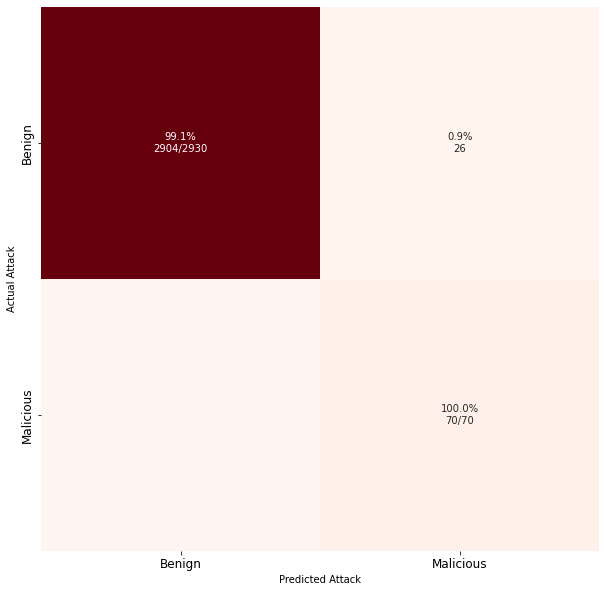

In [50]:
plot_cm(y_test, load_pred_nb)
plt.savefig('cm.eps',dpi=600)

In [51]:
# Define the number of folds for cross-validation
num_folds = 5

# Perform cross-validation
cross_val_scores = cross_val_score(nb_classifier, X_test, y_test, cv=num_folds)

# Print the cross-validation scores
print("Cross-Validation Scores:", cross_val_scores)

# Calculate the mean and standard deviation of the cross-validation scores
mean_score = cross_val_scores.mean()
std_score = cross_val_scores.std()

# Print the mean and standard deviation
print("Mean Score:", mean_score)
print("Standard Deviation:", std_score)

Cross-Validation Scores: [1. 1. 1. 1. 1.]
Mean Score: 1.0
Standard Deviation: 0.0


# ROC 

In [52]:
# Fit the classifiers with training data
Dt_classifier.fit(X_train, y_train)
rf_classifier.fit(X_train, y_train)
lgb_nor.fit(X_train, y_train)

LGBMClassifier()

In [53]:
proba_df = pd.DataFrame({
       
    'DECISIONTREE':Dt_classifier.predict_proba(X_test)[:,1],
    'RANDOMFORREST':rf_classifier.predict_proba(X_test)[:,1],
    'LGBM':lgb_nor.predict_proba(X_test)[:,1],
    'NB':nb_classifier.predict_proba(X_test)[:,1],
    })
proba_df

,DECISIONTREE,RANDOMFORREST,LGBM,NB
0,0.0,0.00,0.000036,4.416734e-72
1,0.0,0.00,0.000036,3.054580e-69
2,0.0,0.00,0.000036,2.856295e-61
3,0.0,0.00,0.000036,9.701660e-57
4,0.0,0.10,0.000036,8.850508e-29
...,...,...,...,...
2995,1.0,0.79,0.999764,1.000000e+00
2996,1.0,0.79,0.999903,1.000000e+00
2997,1.0,0.74,0.999864,1.000000e+00
2998,1.0,0.71,0.999864,1.000000e+00


In [55]:
proba_df.to_csv('probability_test.csv')

DECISIONTREE
  AUC: 1.0
RANDOMFORREST
  AUC: 1.0
LGBM
  AUC: 1.0
NB
  AUC: 0.996


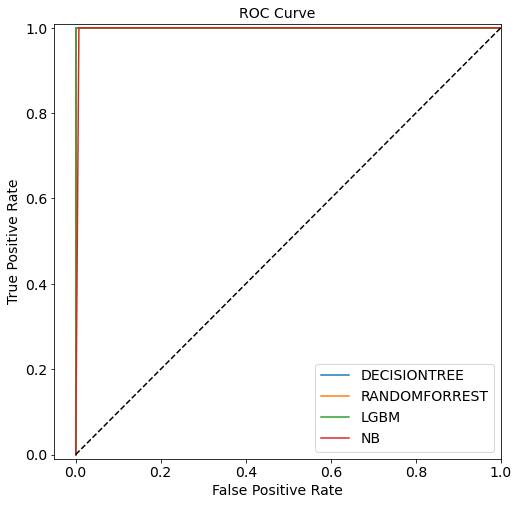

In [56]:
filename_ROC='ROC_curve_Binary_security.png'
plot_roc_curves(proba_df, y_test,filename_ROC)

# Performance Metrics

In [57]:
#estimator and names fuction
def est(clf,names):
    estm=[]
    for i in range(len(clf)):
        n=names[i]
        claf=clf[i]
        estm.append((n,claf))
    return estm
clf=[Dt_classifier,rf_classifier,lgb_nor,nb_classifier]
name=['DecisionTree','RandomForest','LightGBM','NB']
est_1=est(clf,name)

In [58]:
cross_val_scores = {}
accuracy_scores = {}
error_scores = {}
f1_scores = {}
fpr_scores = {}
kappa_scores = {}
mcc_scores = {}
ppv_scores = {}
sensitivity_scores = {}
specificity_scores = {}
auc_scores = {}
y_preds = {}
y_probs = {}
threat_scores = {}
balanced_accuracy_scores = {}


for algorithm, model in est_1:
    y_pred = model.predict(X_test)
    y_prob = model.predict_proba(X_test)
    y_preds[algorithm] = y_pred
    y_probs[algorithm] = y_prob
    
    cross_val_scores[algorithm] = cross_val_score(model, X_train, y_train, cv=10).mean()
    accuracy_scores[algorithm] = accuracy_score(y_test, y_pred)
    error_scores[algorithm] = 1 - accuracy_scores[algorithm]
    f1_scores[algorithm] = f1_score(y_test, y_pred, average="weighted")
    kappa_scores[algorithm] = cohen_kappa_score(y_test, y_pred)
    mcc_scores[algorithm] = matthews_corrcoef(y_test, y_pred)
    ppv_scores[algorithm] = precision_score(y_test, y_pred, average="weighted")
    sensitivity_scores[algorithm] = recall_score(y_test, y_pred, average="weighted")
    confusion_matrix_= confusion_matrix(y_test, y_pred)
    FP = confusion_matrix_.sum(axis=0) - np.diag(confusion_matrix_)  
    FN = confusion_matrix_.sum(axis=1) - np.diag(confusion_matrix_)
    TP = np.diag(confusion_matrix_)
    TN = confusion_matrix_.sum() - (FP + FN + TP)
    fpr_scores[algorithm] = (FP/(FP+TN)).mean()
    specificity_scores[algorithm] = (TN/(TN+FP)).mean()
    threat_scores[algorithm] = (TP/(TP+FN+FP)).mean()
    balanced_accuracy_scores[algorithm] = ((sensitivity_scores[algorithm] + specificity_scores[algorithm])/2).mean()
    print('done for one')


done for one
done for one
done for one
done for one


In [59]:
performance_metrics = {
    'cross_val_scores': cross_val_scores,
    'accuracy_scores': accuracy_scores,
    'error_scores': error_scores,
    'f1_scores': f1_scores,
    'fpr_scores': fpr_scores,
    'kappa_scores': kappa_scores,
    'mcc_scores': mcc_scores,
    'ppv_scores': ppv_scores,
    'sensitivity_scores': sensitivity_scores,
    'specificity_scores': specificity_scores,
    'threat_scores': threat_scores,
    'balanced_accuracy_scores': balanced_accuracy_scores
}

pd.DataFrame(performance_metrics)

,cross_val_scores,accuracy_scores,error_scores,f1_scores,fpr_scores,kappa_scores,mcc_scores,ppv_scores,sensitivity_scores,specificity_scores,threat_scores,balanced_accuracy_scores
DecisionTree,0.997828,1.000000,0.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
RandomForest,0.998014,1.000000,0.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
LightGBM,0.997673,1.000000,0.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
NB,0.994601,0.991333,0.008667,0.991993,0.004437,0.839029,0.850115,0.993681,0.991333,0.995563,0.860146,0.993448


In [61]:
perfo_m=pd.DataFrame(performance_metrics)
perfo_m.to_csv('performance_metrics_maltest.csv')

## Deep learning Model Build 

### Model_5:ANN

In [62]:
# Create the ANN model
model_ann = Sequential()

# Add layers to the model
model_ann.add(Dense(units=64, activation='relu', input_shape=(X_train.shape[1],)))
model_ann.add(Dense(units=32, activation='relu'))
model_ann.add(Dense(units=1, activation='sigmoid'))

# Compile the model
model_ann.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
model_ann.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.1)


Epoch 1/10
907/907 [==============================] - 3s 3ms/step - loss: 1.6055 - accuracy: 0.9558 - val_loss: 0.1594 - val_accuracy: 0.9817
Epoch 2/10
907/907 [==============================] - 2s 2ms/step - loss: 0.3961 - accuracy: 0.9857 - val_loss: 4.5014e-09 - val_accuracy: 1.0000
Epoch 3/10
907/907 [==============================] - 2s 2ms/step - loss: 0.6444 - accuracy: 0.9846 - val_loss: 0.2190 - val_accuracy: 0.9904
Epoch 4/10
907/907 [==============================] - 2s 2ms/step - loss: 0.5697 - accuracy: 0.9867 - val_loss: 7.5719e-08 - val_accuracy: 1.0000
Epoch 5/10
907/907 [==============================] - 2s 2ms/step - loss: 0.4688 - accuracy: 0.9893 - val_loss: 0.1224 - val_accuracy: 0.9929
Epoch 6/10
907/907 [==============================] - 2s 2ms/step - loss: 0.5193 - accuracy: 0.9897 - val_loss: 1.6126e-08 - val_accuracy: 1.0000
Epoch 7/10
907/907 [==============================] - 2s 2ms/step - loss: 0.2116 - accuracy: 0.9938 - val_loss: 1.1065 - val_accuracy: 0

In [63]:
 # Evaluate the model on the test set
loss, accuracy_ann = model_ann.evaluate(X_test, y_test)
print(f'Test accuracy: {accuracy_ann:.5f}')

94/94 [==============================] - 0s 2ms/step - loss: 3.6481 - accuracy: 0.8430
Test accuracy: 0.84300


94/94 [==============================] - 0s 1ms/step


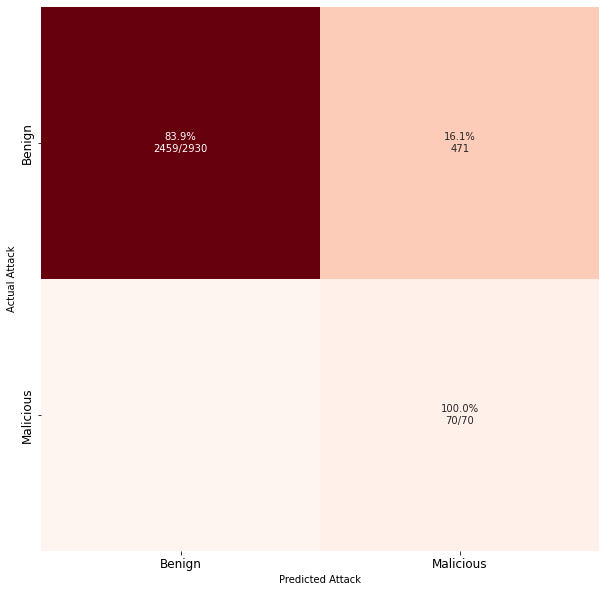

In [64]:
# Save the ANN model to disk
model_ann.save('Binary_security_ann_sm.keras')

# Load the saved ANN model
load_model_ann = load_model('Binary_security_ann_sm.keras')

# Predict using the loaded ANN model
load_pred_ann = load_model_ann.predict(X_test)
load_pred_ann_classes = (load_pred_ann > 0.5).astype(int)  # Convert probabilities to binary classes

plot_cm(y_test, load_pred_ann_classes)
plt.savefig('cm.eps', dpi=600)

### Model_7:CNN

In [65]:
# Normalize the input features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Reshape X_train and X_test to be 3D tensors for CNN
X_train_reshaped = X_train_scaled.reshape(X_train_scaled.shape[0], X_train_scaled.shape[1], 1)
X_test_reshaped = X_test_scaled.reshape(X_test_scaled.shape[0], X_test_scaled.shape[1], 1)

# Create the CNN model
model_cnn = Sequential()

# Add convolutional layers
model_cnn.add(Conv1D(filters=32, kernel_size=3, activation='relu', input_shape=(X_train_scaled.shape[1], 1)))
model_cnn.add(MaxPooling1D(pool_size=2))

model_cnn.add(Conv1D(filters=64, kernel_size=3, activation='relu'))
model_cnn.add(MaxPooling1D(pool_size=2))

# Add fully connected layers
model_cnn.add(Flatten())
model_cnn.add(Dense(units=128, activation='relu'))
model_cnn.add(Dense(units=1, activation='sigmoid'))

# Compile the model
model_cnn.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
model_cnn.fit(X_train_reshaped, y_train, epochs=10, batch_size=32, validation_split=0.1)

# Evaluate the model on the test set
loss, accuracy_cnn = model_cnn.evaluate(X_test_reshaped, y_test)
print(f'Test accuracy: {accuracy_cnn:.4f}')


Epoch 1/10
907/907 [==============================] - 6s 6ms/step - loss: 0.0202 - accuracy: 0.9965 - val_loss: 5.5379e-05 - val_accuracy: 1.0000
Epoch 2/10
907/907 [==============================] - 5s 6ms/step - loss: 0.0031 - accuracy: 0.9989 - val_loss: 3.9065e-05 - val_accuracy: 1.0000
Epoch 3/10
907/907 [==============================] - 5s 5ms/step - loss: 0.0032 - accuracy: 0.9994 - val_loss: 6.6475e-06 - val_accuracy: 1.0000
Epoch 4/10
907/907 [==============================] - 5s 5ms/step - loss: 0.0010 - accuracy: 0.9997 - val_loss: 5.0773e-06 - val_accuracy: 1.0000
Epoch 5/10
907/907 [==============================] - 5s 5ms/step - loss: 8.9063e-04 - accuracy: 0.9997 - val_loss: 2.4583e-06 - val_accuracy: 1.0000
Epoch 6/10
907/907 [==============================] - 5s 5ms/step - loss: 6.4958e-04 - accuracy: 0.9998 - val_loss: 6.7786e-04 - val_accuracy: 0.9997
Epoch 7/10
907/907 [==============================] - 5s 5ms/step - loss: 0.0024 - accuracy: 0.9995 - val_loss: 1.08

### FGSM Attack On CNN

In [66]:
# Save the model to an keras file
model_cnn.save('smote-malmemcnn.keras')

In [67]:
# FGSM Attack
epsilon = 0.01 # Perturbation magnitude

def fgsm_attack(input_image, epsilon, gradient):
    perturbed_image = input_image + epsilon * tf.sign(gradient)
    perturbed_image = tf.clip_by_value(perturbed_image, 0, 255)
    return perturbed_image

In [68]:
# Select a random test example for the attack
random_index = np.random.randint(0, len(X_test_reshaped))
test_example = X_test_reshaped[random_index : random_index + 1]

In [69]:
# Select a random test example for the attack
random_index = np.random.randint(0, len(X_test_reshaped))
test_example = X_test_reshaped[random_index : random_index + 1]

# Convert the NumPy array to a TensorFlow tensor
test_example_tensor = tf.convert_to_tensor(test_example)
#test_example_tensor

In [70]:
# Calculate gradients
with tf.GradientTape() as tape:
    tape.watch(test_example_tensor)
    prediction = model_cnn(test_example_tensor)
    # Convert Pandas Series to NumPy array and reshape
    y_test_slice = y_test[random_index : random_index + 1].to_numpy().reshape(prediction.shape)
    loss = tf.keras.losses.binary_crossentropy(y_test_slice, prediction)

gradient = tape.gradient(loss, test_example_tensor)

# Create adversarial example using FGSM
adversarial_example = fgsm_attack(test_example_tensor, epsilon, gradient)

# Convert the adversarial example back to a NumPy array
adversarial_example_np = adversarial_example.numpy()

# Evaluate the model on the adversarial example
adversarial_accuracy = model_cnn.evaluate(adversarial_example_np, y_test_slice)[1]
print(f'Adversarial accuracy: {adversarial_accuracy:.6f}')


1/1 [==============================] - 0s 37ms/step - loss: 4.3230e-09 - accuracy: 1.0000
Adversarial accuracy: 1.000000


The result  provided is related to the Fast Gradient Sign Method (FGSM) applied to CNN model. Let's break down the output:

[==============================]: This is typically a visual representation of the progress of the attack and may vary depending on the software or library used. It's a visual indicator to show the progress of the attack.

- 0s 36ms/step: This part of the output indicates the time taken for each step of the attack. In this case, each step took 36 milliseconds.

loss: 4.3230e-09 The loss value after the FGSM attack. A very low loss value suggests that the adversarial example generated by the attack is very close to the original example. In this case, the loss is extremely small, indicating a highly successful attack in terms of adversarial perturbation.

accuracy: 1.0000: The accuracy of the model on the adversarial example after the FGSM attack. An accuracy of 1.0000 (100%) suggests that the attack was successful in crafting an adversarial example that misleads the model into making an incorrect prediction. The model is completely fooled by the adversarial input.

Adversarial accuracy: 1.000000: This line reaffirms that after the attack, the model's accuracy on the adversarial example is 1.000000, which means the model's prediction is incorrect when presented with this adversarial input.

In summary, the output indicates that the FGSM attack successfully created an adversarial example that the CNN model misclassified, resulting in an accuracy of 0% on this specific adversarial input. The attack appears to be highly effective in fooling the model.

### JSMA Attack On CNN

In [80]:
# Load your trained model
model = load_model('smote-malmemcnn.keras')

# Define the target class for the attack
target_class = 0  # Change this to the desired target class index

# Define the maximum perturbation limit (epsilon)
epsilon = 1 # Adjust as needed

# Define the number of features in your input data
num_features = X_train_reshaped.shape[1]

In [81]:
# Define a function to compute the saliency map
def compute_saliency_map(input_image, target_class):
    with tf.GradientTape() as tape:
        tape.watch(input_image)
        prediction = model(input_image)
        target_probability = prediction[0, target_class]
    
    gradient = tape.gradient(target_probability, input_image)
    saliency_map = tf.abs(gradient)
    
    return saliency_map

def jsma_attack(input_image, target_class, epsilon, max_iters=100):
    input_image = tf.convert_to_tensor(input_image)
    
    perturbation = np.zeros_like(input_image)
    for _ in range(max_iters):
        saliency_map = compute_saliency_map(input_image, target_class)
        
        # Find the index of the pixel with the highest saliency
        max_pixel_index = tf.argmax(saliency_map)
        
        # Apply perturbation to the pixel with the highest saliency
        perturbation[max_pixel_index] += epsilon
        
        # Apply perturbation to the input image
        adversarial_image = input_image + perturbation
        
        # Check if the attack is successful (changed predicted class)
        prediction = model.predict(adversarial_image)
        if np.argmax(prediction) != target_class:
            break
        
    return adversarial_image.numpy()

In [82]:
# Select a random test example for the attack
random_index = np.random.randint(1, len(X_test_reshaped))
test_example = X_test_reshaped[random_index : random_index + 1]

In [83]:
# Generate adversarial example using JSMA
adversarial_example = jsma_attack(test_example, target_class, epsilon)

1/1 [==============================] - 0s 33ms/step


In [84]:
# Evaluate the model on the adversarial example
original_prediction = model.predict(test_example)
adversarial_prediction = model.predict(adversarial_example)

print(f'Original prediction: {original_prediction}')
print(f'Adversarial prediction: {adversarial_prediction}')

1/1 [==============================] - 0s 30ms/step
Original prediction: [[3.8596417e-07]]
Adversarial prediction: [[0.]]


The result is related to  the Jacobian-based Saliency Map Attack (JSMA). Let's break down the output:

"Original prediction: [[3.8596417e-07]]": This is the prediction made by your CNN model on the original input data. The value "[[3.8596417e-07]]" represents a very small probability or confidence score that the input belongs to a particular class. In this case, it's close to zero, indicating low confidence in the original classification.

"Adversarial prediction: [[0]]": This is the prediction made by your CNN model on the input data after applying the JSMA attack. The value "[[0]]" is an even smaller probability, which indicates an extremely low confidence score for the adversarial classification. The attack has likely perturbed the input in a way that the model no longer recognizes it as the original class, resulting in a different, very low-confidence prediction.

In the context of adversarial attacks, the goal of the attacker is to make small, imperceptible changes to the input data that lead to a misclassification or a significant reduction in confidence for the correct classification. In this case, the adversarial prediction demonstrates that the JSMA attack has succeeded in causing the model to make a prediction different from the original, and with very low confidence in that prediction.

It's important to note that the JSMA attack is a technique used to test the robustness of machine learning models against adversarial examples. Adversarial attacks can help identify vulnerabilities in models and lead to improved model defenses.